<a href="https://colab.research.google.com/github/byu-cce270/content/blob/main/docs/unit3/04_pandas_part2/HW_Pandas_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###import statements

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

dfs = pd.read_excel('/content/productivity-part2pandas.xlsx', sheet_name=None)
for sheet_name, df in dfs.items():
  print(f"Sheet name: {sheet_name}")
  print(df.head())

Sheet name: equipment
   Equipment ID Equipment Type  Max Load Capacity (cu yds)  Hourly Rate  \
0             1      Excavator                         2.5          120   
1             2     Dump Trump                        10.0           80   
2             3      Bulldozer                         5.0          150   
3             4      Excavatro                         3.0          130   
4             5     Dump Truck                        12.0           90   

   Year Purchased  Condition  
0            2018       Good  
1            2016       Fair  
2            2020  Excellent  
3            2019       Good  
4            2015       Fair  
Sheet name: productivity
   Equipment ID Project Site  Soil Moved (cu yds)  Hours Used  \
0             1       Site A                   25          10   
1             2       Site B                   50           6   
2             3       Site A                   20           8   
3             1       Site C                   45       

In [ ]:
equipment_df =dfs['equipment']
productivity_df =dfs['productivity']

equipment_df.head()
productivity_df.head()

,Equipment ID,Project Site,Soil Moved (cu yds),Hours Used,Fuel Consumed (gallons),Operator ID,Weather Conditions
0,1,Site A,25,10,40,101,Sunny
1,2,Site B,50,6,70,102,Rainy
2,3,Site A,20,8,50,103,Cloudy
3,1,Site C,45,12,100,104,Sunny
4,5,Site B,55,7,80,105,Sunny


In [ ]:
# Standardize column names and handle missing data
equipment_df.columns = equipment_df.columns.str.strip().str.lower()
productivity_df.columns = productivity_df.columns.str.strip().str.lower()
equipment_df.drop_duplicates(inplace=True)
productivity_df.drop_duplicates(inplace=True)



In [ ]:
# Convert Year_Purchased to datetime and calculate age
equipment_df['year purchased'] = pd.to_datetime(equipment_df['year purchased'], format='%Y')
equipment_df['age (years)'] = 2024 - equipment_df['year purchased'].dt.year



In [ ]:
# Step 2: Merge DataFrames and Filter
merged_df = pd.merge(productivity_df, equipment_df, on='equipment id')
merged_df = merged_df[merged_df['hours used'] > 0]



In [ ]:
# Step 3: Calculate New Metrics
merged_df['efficiency (cubic yards/hour)'] = merged_df['soil moved (cu yds)'] / merged_df['hours used']
merged_df['fuel_efficiency (cubic yards/gallon)'] = merged_df['soil moved (cu yds)'] / merged_df['fuel consumed (gallons)']
merged_df['total_cost ($)'] = merged_df['hourly rate'] * merged_df['hours used']
merged_df['Cost per Cubic Yard ($)'] = merged_df['total_cost ($)'] / merged_df['soil moved (cu yds)']



In [ ]:
# Step 4: Group and Analyze the Data
efficiency_by_type = merged_df.groupby('equipment type')['efficiency (cubic yards/hour)'].mean()
cost_by_site = merged_df.groupby('project site')['total_cost ($)'].sum()
fuel_by_weather = merged_df.groupby('weather conditions')['fuel_efficiency (cubic yards/gallon)'].mean()

print("Average Efficiency by Equipment Type:\n", efficiency_by_type)
print("\nTotal Cost by Project Site:\n", cost_by_site)
print("\nFuel Efficiency by Weather Condition:\n", fuel_by_weather)



Average Efficiency by Equipment Type:
 equipment type
Bulldozer     3.155271
Dump Truck    7.452381
Dump Trump    7.916667
Excavator     4.335714
Excavatro     5.000000
Grader        4.500000
Loader        4.027778
Name: efficiency (cubic yards/hour), dtype: float64

Total Cost by Project Site:
 project site
Site A    6805
Site B    3270
Site C    5890
Site D    3125
Name: total_cost ($), dtype: int64

Fuel Efficiency by Weather Condition:
 weather conditions
Cloudy    0.551023
Rainy     0.584327
Snowy     0.416667
Sunny     0.633817
Windy     0.472727
Name: fuel_efficiency (cubic yards/gallon), dtype: float64


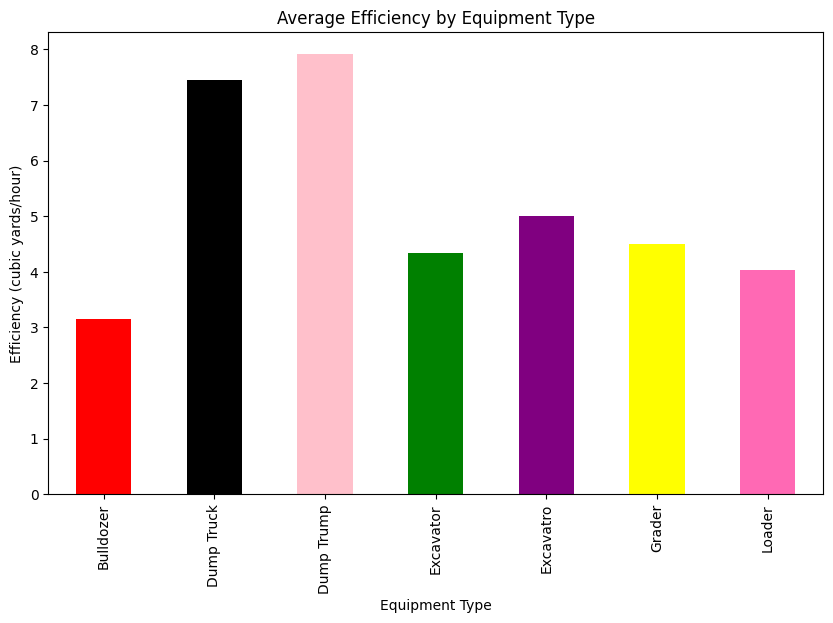

In [ ]:
# Step 6: Visualization
plt.figure(figsize=(10, 6))
efficiency_by_type.plot(kind='bar', title='Average Efficiency by Equipment Type', color = ['red','black','pink','green','purple', 'yellow','hotpink'])
plt.xlabel('Equipment Type')
plt.ylabel('Efficiency (cubic yards/hour)')
plt.show()